# Testes de hipóteses

## Importação de bibliotecas:

In [33]:
from scipy.stats import norm, ks_1samp, shapiro, levene, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import numpy as np

## Introdução:

### Definição:

Uma **hipótese estatística** é uma suposição sobre determinado parâmetro da população, como

<ul>
    <li>média</li>
    <li>desvio-padrão</li>
    <li>coeficiente de correlação</li>
    <li>etc.</li>
</ul>

Um teste de hipótese é um procedimento para decisão sobre a veracidade ou falsidade de determinada hipótese **dentro de um limite**. Para uma hipótese estatística ser validada ou rejeitada com certeza, seria necessário examinarmos toda a população, o que, na prática, é inviável.

Como alternativa, extraímos uma amostra aleatória da população de interesse. Como a decisão é tomada com base na amostra, podem ocorrer erros (rejeitar uma hipótese quando ela for verdadeira ou não rejeitar uma hipótese quando ela for falsa), como será visto mais adiante.

O procedimento e os conceitos necessários para a construção de um teste de hipótese serão apresentados a seguir. Vamos considerar $X$ uma variável associada a uma população e $\theta$ determinado parâmetro dessa população. Devemos definir a hipótese a ser testada sobre o parâmetro $\theta$ dessa população, que é chamada de *hipótese nula*:

$$
H_0: \theta = \theta_0
$$

Definiremos também a hipótese alternativa ($H_1$), caso $H_0$ seja rejeitada, que pode ser caracterizada da seguinte forma:

$$
H_1: \theta \neq \theta_0
$$

e o teste é chamado de **teste bilateral (ou bicaudal)**.

O nível de significância ($\alpha$) de um teste representa a probabilidade de rejeitar a hipótese nula quando ela for verdadeira (é um dos dois tipos de erros que podem ocorrer, conforme veremos adiante). 

A região crítica (RC) de um teste bilateral é representada por duas caudas de tamanhos iguais, respectivamente na extremidade esquerda e direita da curva de distribuição, e cada uma delas corresponde à metade do nível de significância $\alpha$:

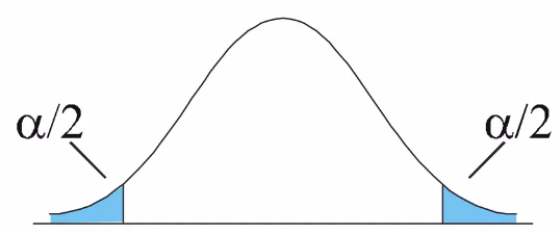

Outra forma de definir a hipótese alternativa seria:

$$
H_1: \theta > \theta_0
$$

e o teste é chamado **unilateral (ou unicaudal) à direita**.

Ou, ainda, a hipótese alternativa poderia ser:

$$
H_1: \theta < \theta_0
$$

e o teste é chamado **unilateral (ou unicaudal) à esquerda**.

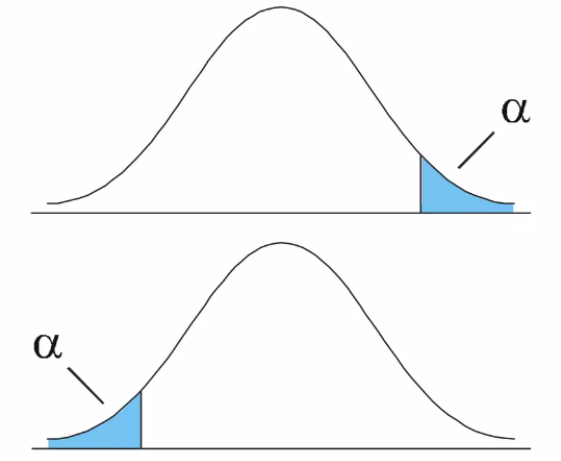

Assim, quando o objetivo for verificar se um parâmetro é significativamente superior ou inferior a determinado valor, utilizamos um teste unilateral. Por outro lado, se o objetivo for verificar se um parâmetro é diferente de determinado valor, utilizamos o teste bilateral.

Basicamente, $H_0$ e $H_1$ devem ser mutualmente exclusivos e $H_1$ não deve conter igualdade:

$$
\begin{align}
H_0: \theta = \theta_0 \qquad & H_1: \theta \neq \theta_0 \\
H_0: \theta \le \theta_0  \qquad & H_1: \theta > \theta_0 \\
H_0: \theta \ge \theta_0  \qquad & H_1: \theta < \theta_0 
\end{align}
$$

Definida a hipótese nula a ser testada, por meio de uma amostra aleatória coletada na população, comprovamos ou não tal hipótese. Como a decisão é tomada com base na amostra, dois tipos de erros podem ocorrer:

*Erro de tipo I*: rejeitar a hipótese nula quando ela for verdadeira. A probabilidade desse tipo de erro é representada por $\alpha$:

$$
P(\text{erro do tipo I}) = P(\text{rejeitar } H_0 \ | \  H_0 \text{ é verdadeira}) = \alpha
$$

> "A probabilidade de cometer um erro do tipo I, ou seja, a probabilidade de rejeitar a hipótese nula quando ela é verdadeira, é igual a alfa (α)."

*Erro de tipo II*: não rejeitar a hipótese nula quando ela for falsa. A probabilidade desse tipo de erro é representada por $\beta$:

$$
P(\text{erro do tipo II}) = P(\text{não rejeitar } H_0 \ | \  H_0 \text{ é falsa}) = \beta
$$

> "A probabilidade de cometer um erro do tipo II, ou seja, a probabilidade de não rejeitar a hipótese nula quando ela é falsa, é igual a beta (β)."

Resumindo:

Decisão | $H_0$ é verdadeira | $H_0$ é falsa
--- | --- | ---
Não rejeitar $H_0$ | Decisão correta ($1 - \alpha$) | Erro do tipo II ($\beta$)
Rejeitar $H_0$ |  Erro do tipo I ($\alpha$) | Decisão correta ($1 - \beta$) |

### Procedimento para construção de testes de hipóteses:

- Passo 1: Escolher o teste estatístico adequado
- Passo 2: Apresentar a hipótese nula $H_0$ e a hipótese alternativa $H_1$ do teste
- Passo 3: Fixar o nível de significância $\alpha$
- Passo 4: Calcular o valor observado da estatística do teste com base na amostra extraída da população
- Passo 5: Determinar o valor p que corresponde à probabilidade associada ao valor da estatística do teste calculado no passo 4
- Passo 6: Decidir: se o valor de valor p for menor do que o nível de significância $\alpha$ estabelecido no passo 3, rejeitar $H_0$; caso contrário, não rejeitar $H_0$

O **nível de significância (α)** é um limiar predefinido que usamos para decidir se iremos ou não rejeitar a hipótese nula e o modelo subjacente. Ele representa a probabilidade máxima que estamos dispostos a aceitar de cometer um erro do Tipo I (rejeitar a hipótese nula, e o modelo subjacente, quando ela se ajusta bem aos dados).

- O nível de significância comum é α = 0,05, o que significa que estamos dispostos a aceitar um risco de 5% de cometer um erro ao rejeitar a hipótese nula.
- Se o valor p for menor que α, rejeitamos a hipótese nula. Se for maior ou igual a α, não rejeitamos a hipótese nula.


O *P-value* (P-valor, valor p ou valor P) corresponde à probabilidade associada ao valor da estatística do teste calculado a partir da amostra. O *P-value* indica o menor nível de significância observado que levaria à rejeição da hipótese nula. Assim, rejeitamos $H_0$ se $P \le \alpha$.

O **valor p** é uma medida utilizada para ajudar a decidir se faz sentido rejeitar a hipótese nula. Ele representa a probabilidade de obtermos um resultado tão extremo quanto o observado, assumindo que a hipótese nula seja verdadeira (e todas as considerações a respeito do modelo estatístico). Em termos simples, o valor p nos diz o quão compatíveis nossos dados são com a hipótese nula.

- Um valor p baixo indica que os dados observados são pouco prováveis sob a hipótese nula, sugerindo que devemos considerar rejeitar a hipótese nula em favor da hipótese alternativa.
- Um valor p alto indica que os dados observados são compatíveis com a hipótese nula, e, portanto, não temos evidências suficientes para rejeitá-la.

O valor p pode ser visto como uma medida contínua de compatibilidade entre os dados e todo o modelo usado para calculá-lo, variando de 0 (completa incompatibilidade) até 1 (perfeita compatibilidade). Nesse sentido, pode ser visto como uma medida do fit (ajuste) do modelo aos dados.

### Divisão dos testes em paramétricos e não paramétricos:

Os testes de hipóteses dividem-se em paramétricos e não paramétricos.

Os **testes paramétricos** envolvem parâmetros populacionais. Um parâmetro é qualquer medida numérica ou característica quantitativa que descreve a população. São valores fixos, usualmente desconhecidos, como a média populacional, o desvio-padrão populacional, a variância populacional, etc. Os testes paramétricos exigem suposições fortes em relação à distribuição dos dados.

Os **testes não paramétricos** formulam hipóteses sobre características qualitativas da população. Podem ser aplicados para dados de natureza qualitativa, em escala nominal ou ordinal. São testes livres de distribuição.

Quanto aos dados, nós podemos ter dados independentes/não pareados ou dependentes/pareados. **Dados independentes** são aqueles que não têm relação entre si. **Dados dependentes** são aqueles que têm relação entre si, como, por exemplo, antes e depois de um tratamento, ou dados de gêmeos, etc.

Exemplos de dados não pareados: comparação de médias de alunos de duas escolas diferentes. Exemplos de dados pareados: comparação de médias de alunos de uma mesma escola antes e depois de um treinamento. Em dados pareados também podemos ter a comparação de médias de alunos de duas escolas diferentes, mas que são pareados por alguma característica, como idade, sexo, etc.

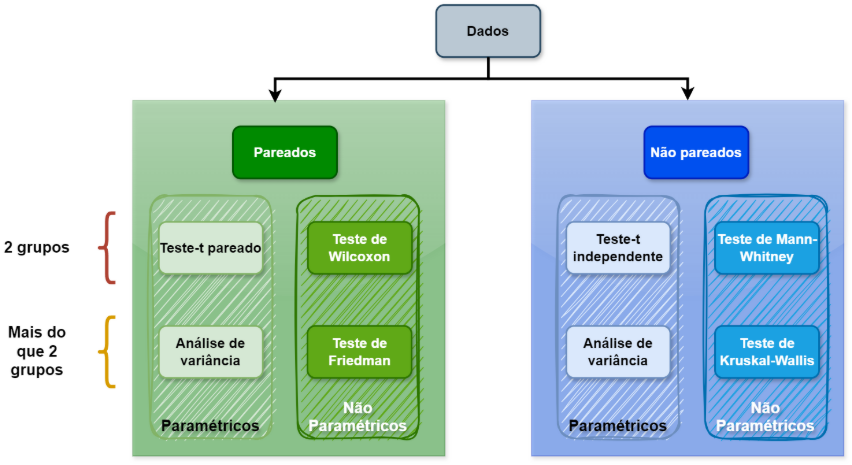

## Testes para distribuições, Normal e homogeneidade:

### Teste de Kolmogorov-Smirnov

O teste de Kolmogorov-Smirnov (K-S) é um teste de aderência, isto é, compara a distribuição de frequências acumuladas de um conjunto de valores amostrais (valores observados) com uma distribuição teórica. O objetivo é testar se os valores amostrais são oriundos de uma população com suposta distribuição teórica ou esperada,
no nosso caso a distribuição normal. A estatística do teste é o ponto de maior diferença (em valor absoluto) entre as duas distribuições.

Para utilização do teste de K-S, a média e o desvio-padrão da população devem ser conhecidos. Para pequenas amostras, o teste perde potência, de modo que deve ser utilizado em amostras relativamente grandes ($n \ge 30$).

O teste de K-S assume as seguintes hipóteses:

- $H_0$: a amostra provém de uma população com determinada distribuição
- $H_1$: a amostra não provém de uma população com determinada distribuição

#### Lendo dataset

<small>**Exemplo**: A base de dados abaixo apresenta os dados de produção mensal de máquinas agrícolas de uma empresa nos últimos 36 meses. Verifique se os dados são provenientes de uma população com distribuição normal, considerando $\alpha = 5 \%$.</small>

In [34]:
df_maquinas_agricolas = pl.read_csv(
    source = "../../databases/farming_equipment.csv"
)

print(df_maquinas_agricolas.shape)
df_maquinas_agricolas.head(2)

(36, 1)


production
i64
52
50


#### Definindo hipóteses nulas e alternativas

- $H_0$: a amostra provém de uma população com distribuição normal
- $H_1$: a amostra não provém de uma população com distribuição normal

#### Calculando métricas com <code>ks_1samp</code>

In [35]:
ks_results = ks_1samp(
    x = df_maquinas_agricolas["production"],
    cdf = norm.cdf,
    args = (
        df_maquinas_agricolas["production"].mean(),
        df_maquinas_agricolas["production"].std(),
    )
)

print(ks_results)

KstestResult(statistic=np.float64(0.1184298337535814), pvalue=np.float64(0.6502794267036324), statistic_location=np.float64(44.0), statistic_sign=np.int8(1))


In [36]:
alpha = 0.05
print("pvalue:", ks_results.pvalue)

if ks_results.pvalue <= alpha:
    print("Rejeitamos a hipótese nula")
else: # Quando pvalue não é menor que alpha:
    print("Não rejeitamos a hipótese nula")

pvalue: 0.6502794267036324
Não rejeitamos a hipótese nula


#### Conclusão:

Dado que:

- $H_0$: a amostra provém de uma população com distribuição normal
- $H_1$: a amostra não provém de uma população com distribuição normal

Então, ao **não rejeitar $H_0$**, dizemos que temos **95%** de confiança estatística dizer que a amostra é normal. Portanto, quem sabe, a população a quem ela representa o é.

### Teste de Shapiro-Wilk

Teste utilizado para avaliar exclusivamente distribuição normal. No caso, ele é bem rigoroso para amostras grandes - logo deve ser mais utilizado em **amostras menores**. Ele é o preterido para fazer essa avaliação; mas deve ser substituido pelo <code>Kolmogorov-Smirnov</code> para amostras maiores.

#### Lendo dataset

In [37]:
df_avioes = pl.read_csv(
    source = "../../databases/aircraft.csv"
)

print(df_avioes.shape)
df_avioes.head(2)

(24, 1)


production
i64
28
32


#### Definindo hipóteses nulas e alternativas

- $H_0$: a amostra segue uma distribuição normal;
- $H_1$: a amostra não segue uma distribuição normal.

#### Calculando métricas com <code>ks_1samp</code>

In [38]:
alpha = 0.05

sw_results = shapiro(
    df_avioes["production"]
)

print("pvalue:", sw_results.pvalue)

if sw_results.pvalue <= alpha:
    print("Rejeitamos a hipótese nula")
else: # Quando pvalue não é menor que alpha:
    print("Não rejeitamos a hipótese nula")

pvalue: 0.8565108931130727
Não rejeitamos a hipótese nula


#### Conclusão:

Dado que:

- $H_0$: a amostra provém de uma população com distribuição normal
- $H_1$: a amostra não provém de uma população com distribuição normal

Então, ao **não rejeitar $H_0$**, dizemos que temos **95%** de confiança estatística ao dizer que a amostra é normal. Portanto, quem sabe, a população a quem ela representa o é.

### Teste de Levene

O **teste de Levene** é utilizado para averiguar homogenidade entre amostras - classificadas como distribuições normais. Como sempre, <code>pvalue</code> determinará se devemos rejeitar a hipótese nula ou alternativa:

$$
H_0: \sigma_1^2 = \sigma_2^2 = \cdots = \sigma_k^2
$$

$$
H_1: \exists_{i,j}: \sigma_i^2 \neq \sigma_j^2 (i, j = 1, \cdots, k)
$$

#### Leitura da base de dados

In [39]:
df_supermercados = pl.read_csv(
    source = "../../databases/customers_stores.csv"
)

print(df_supermercados.shape)
df_supermercados.head(2)

(14, 4)


Dia,Loja_1,Loja_2,Loja_3
str,i64,i64,i64
"""Dia 1""",620,710,924
"""Dia 2""",630,780,695


#### Definindo hipóteses nulas e alternativas:

- $H_0$: a amostra é homogênea
- $H_1$: a amostra não é homogênea

#### Calculando métricas com <code>levene</code>

In [40]:
alpha = 0.05

levene_results = levene(
    df_supermercados["Loja_1"], df_supermercados["Loja_2"], df_supermercados["Loja_3"]
)

print("pvalue:", levene_results.pvalue)

if levene_results.pvalue <= alpha:
    print("Rejeitamos a hipótese nula")
else: # Quando pvalue não é menor que alpha:
    print("Não rejeitamos a hipótese nula")

pvalue: 0.013172093354888805
Rejeitamos a hipótese nula


#### Conclusão:

Dado que:

- $H_0$: a amostra é homogênea
- $H_1$: a amostra não é homogênea

Então, ao **rejeitar $H_0$**, dizemos que temos **95%** de confiança estatística ao dizer que a amostra não é homogenizada.

## Teste Z

Os métodos paramétricos são aplicados para dados quantitativos e exigem suposições fortes para sua validação, incluindo:

- as observações devem ser independentes;
- a amostra deve ser retirada de populações com determinada distribuição, geralmente a normal;
- as populações devem ter variâncias iguais para testes de comparação de duas médias populacionais emparelhadas ou $k$ médias populacionais ($k \ge 3$);
- as variáveis em estudo devem ser medidas em escala intervalar ou de razão, do modo que seja possível utilizar operações aritméticas sobre os respectivos valores.

### Desvio-padrão populacional ($\sigma$) for conhecido e a distribuição for normal

Esse teste é aplicado quando uma amostra aleatória de tamanho $n$ for extraída de uma população com distribuição normal com média ($\mu$) desconhecida e desvio-padrão ($\sigma$) conhecido. 

Para um teste bilateral, as hipóteses são:

- $H_0$: a amostra provém de uma população com determinada média ($\mu = \mu_0$)
- $H_1$: contesta a hipótese nula ($\mu \neq \mu_0$)

A estatística do teste refere-se à média amostral ($\bar{X}$), tal que:

$$
Z_{cal} = \frac{\bar{X} - \mu_0}{\sigma_{\bar{X}}} \quad \text{ em que } \sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}
$$

#### Leitura do dataset

Exemplo: Um fabricante de caixas de papelão deseja verificar se a quantidade de papelão que está sendo utilizada em cada caixa está de acodo com seu padrão histórico, pois existem indícios de que o consumo aumentou. Historicamente, são utilizados, em média 100 g de papelão em cada caixa e o desvio padrão é de 12 g. Coletou-se uma amostra (base a seguir) para verificar se a média atual é **maior** do que a média histórica.

<small>
    Pelo enunciado, temos que:

-   $\bar{X} = 100g$ 
-   ${\sigma} = 12g$
</small>

In [41]:
df_papelao = pl.read_csv(
    source = "../../databases/papelao.csv"
)

print(df_papelao.shape)
df_papelao.head(2)

(40, 1)


massa
i64
102
107


#### Definindo Hipóteses Nulas e Alternativas

Uma forma de definir corretamente a hipótese nula, e sempre tentar assumir que ela vai num resultado neutro/favorável:

- $H_0$: a amostra dos último levantamemento não teve uma média acima do esperado;
- $H_1$: a amostra dos último levantamemento teve uma média acima do esperado;

In [42]:
mean_sample = df_papelao["massa"].mean()
std_sample = 12/np.sqrt(df_papelao.shape[0])

Z = (mean_sample - 100)/std_sample

print(f"mean sample: {mean_sample:.3f}")
print(f"std sample: {std_sample:.3f}")
print(f"Z: {Z:.3f}")

alpha = 1 - norm.cdf(Z)

print(f"alpha: {alpha:.3f}")

mean sample: 104.075
std sample: 1.897
Z: 2.148
alpha: 0.016


#### Conclusão:

Como $alpha < 0.05$, rejeitamos hipótese nula a um nível de significância de 95%. Logo, podemos dizer que a produção recente tem ultrapassado a média de gastos do histórico anterior.

### Desvio-padrão populacional ($\sigma$) não for conhecido

O teste *t* de *Student* para uma amostra é aplicado quando não conhecemos o desvio-padrão da população ($\sigma$), de modo que seu valor é estimado a partir do desvio-padrão da amostra ($S$), resultando na distribuição t de Student:


$$
T_{cal} = \frac{\bar{X} - \mu_0}{\frac{S}{\sqrt{n}}}
$$
Para um teste bilateral, as hipóteses são:

- $H_0$: a amostra provém de uma população com determinada média ($\mu = \mu_0$)
- $H_1$: contesta a hipótese nula ($\mu \neq \mu_0$)


#### Leitura do dataset

Exemplo: O tempo médio de processamento de determinada tarefa em uma máquina tem sido de 18 minutos. Foram introduzidos novos conceitos para reduzir o tempo médio de processamento. Desta forma, após certo período, coletou-se uma amostra de 25 elementos (base a seguir). Verifique se o resultado evidencia uma melhora no tempo médio de processamento. Considere $\alpha = 1 \%$.

<small>
    Pelo enunciado, temos que:

-   $\mu_0 = 18min$
</small>

In [43]:
df_maquina = pl.read_csv(
    source = "../../databases/tempo_maquina.csv"
)

print(df_maquina.shape)
df_maquina.head(2)

(25, 1)


tempo
f64
21.5
16.0


#### Definindo Hipóteses Nulas e Alternativas

- $H_0$: a amostra dos último levantamemento teve uma média acima do esperado;
- $H_1$: a amostra dos último levantamemento teve uma média média de tempo menor ou igual ao esperado;

In [44]:
ttest_1samp_results = ttest_1samp(
    a = df_maquina["tempo"],
    popmean = 18,
    alternative = "less"
)

print(ttest_1samp_results)

TtestResult(statistic=np.float64(-2.244518242956968), pvalue=np.float64(0.01714313510953804), df=np.int64(24))


#### Conclusão:

Como $alpha >= 0.01$, rejeitamos hipótese nula a um nível de significância de 99%. Logo, podemos dizer que a produção recente não tem uma média de tempo menor ou igual ao esperado.